Bộ dữ liệu có nội dung về sự đánh giá của người dùng đối với các bộ phim. Mỗi người dùng có thể đánh giá nhiều bộ phim và mỗi bộ phim có thể được đánh giá bởi nhiều người dùng.

## Import thư viện

In [5]:
import networkx as nx # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd
import numpy as np

## Load dataset tạo đồ thị

In [6]:
n = 200

data = pd.read_csv('./Dataset/Dataset.csv', sep=',', header=0)[:n]
data = data.dropna()

# Lấy danh sách người dùng và phim
users = data['userId'].unique()
movies = data['tmdbId'].unique()

# Tạo danh sách cạnh
edges = list(zip(data['userId'], data['tmdbId']))

# Tạo đồ thị hai phía (users và movies)
B = nx.Graph()

B.add_nodes_from(users, bipartite=0)  # Nhóm người dùng
B.add_nodes_from(movies, bipartite=1)   # Nhóm phim

B.add_edges_from(edges)

## Trực quan hóa đồ thị hai phía

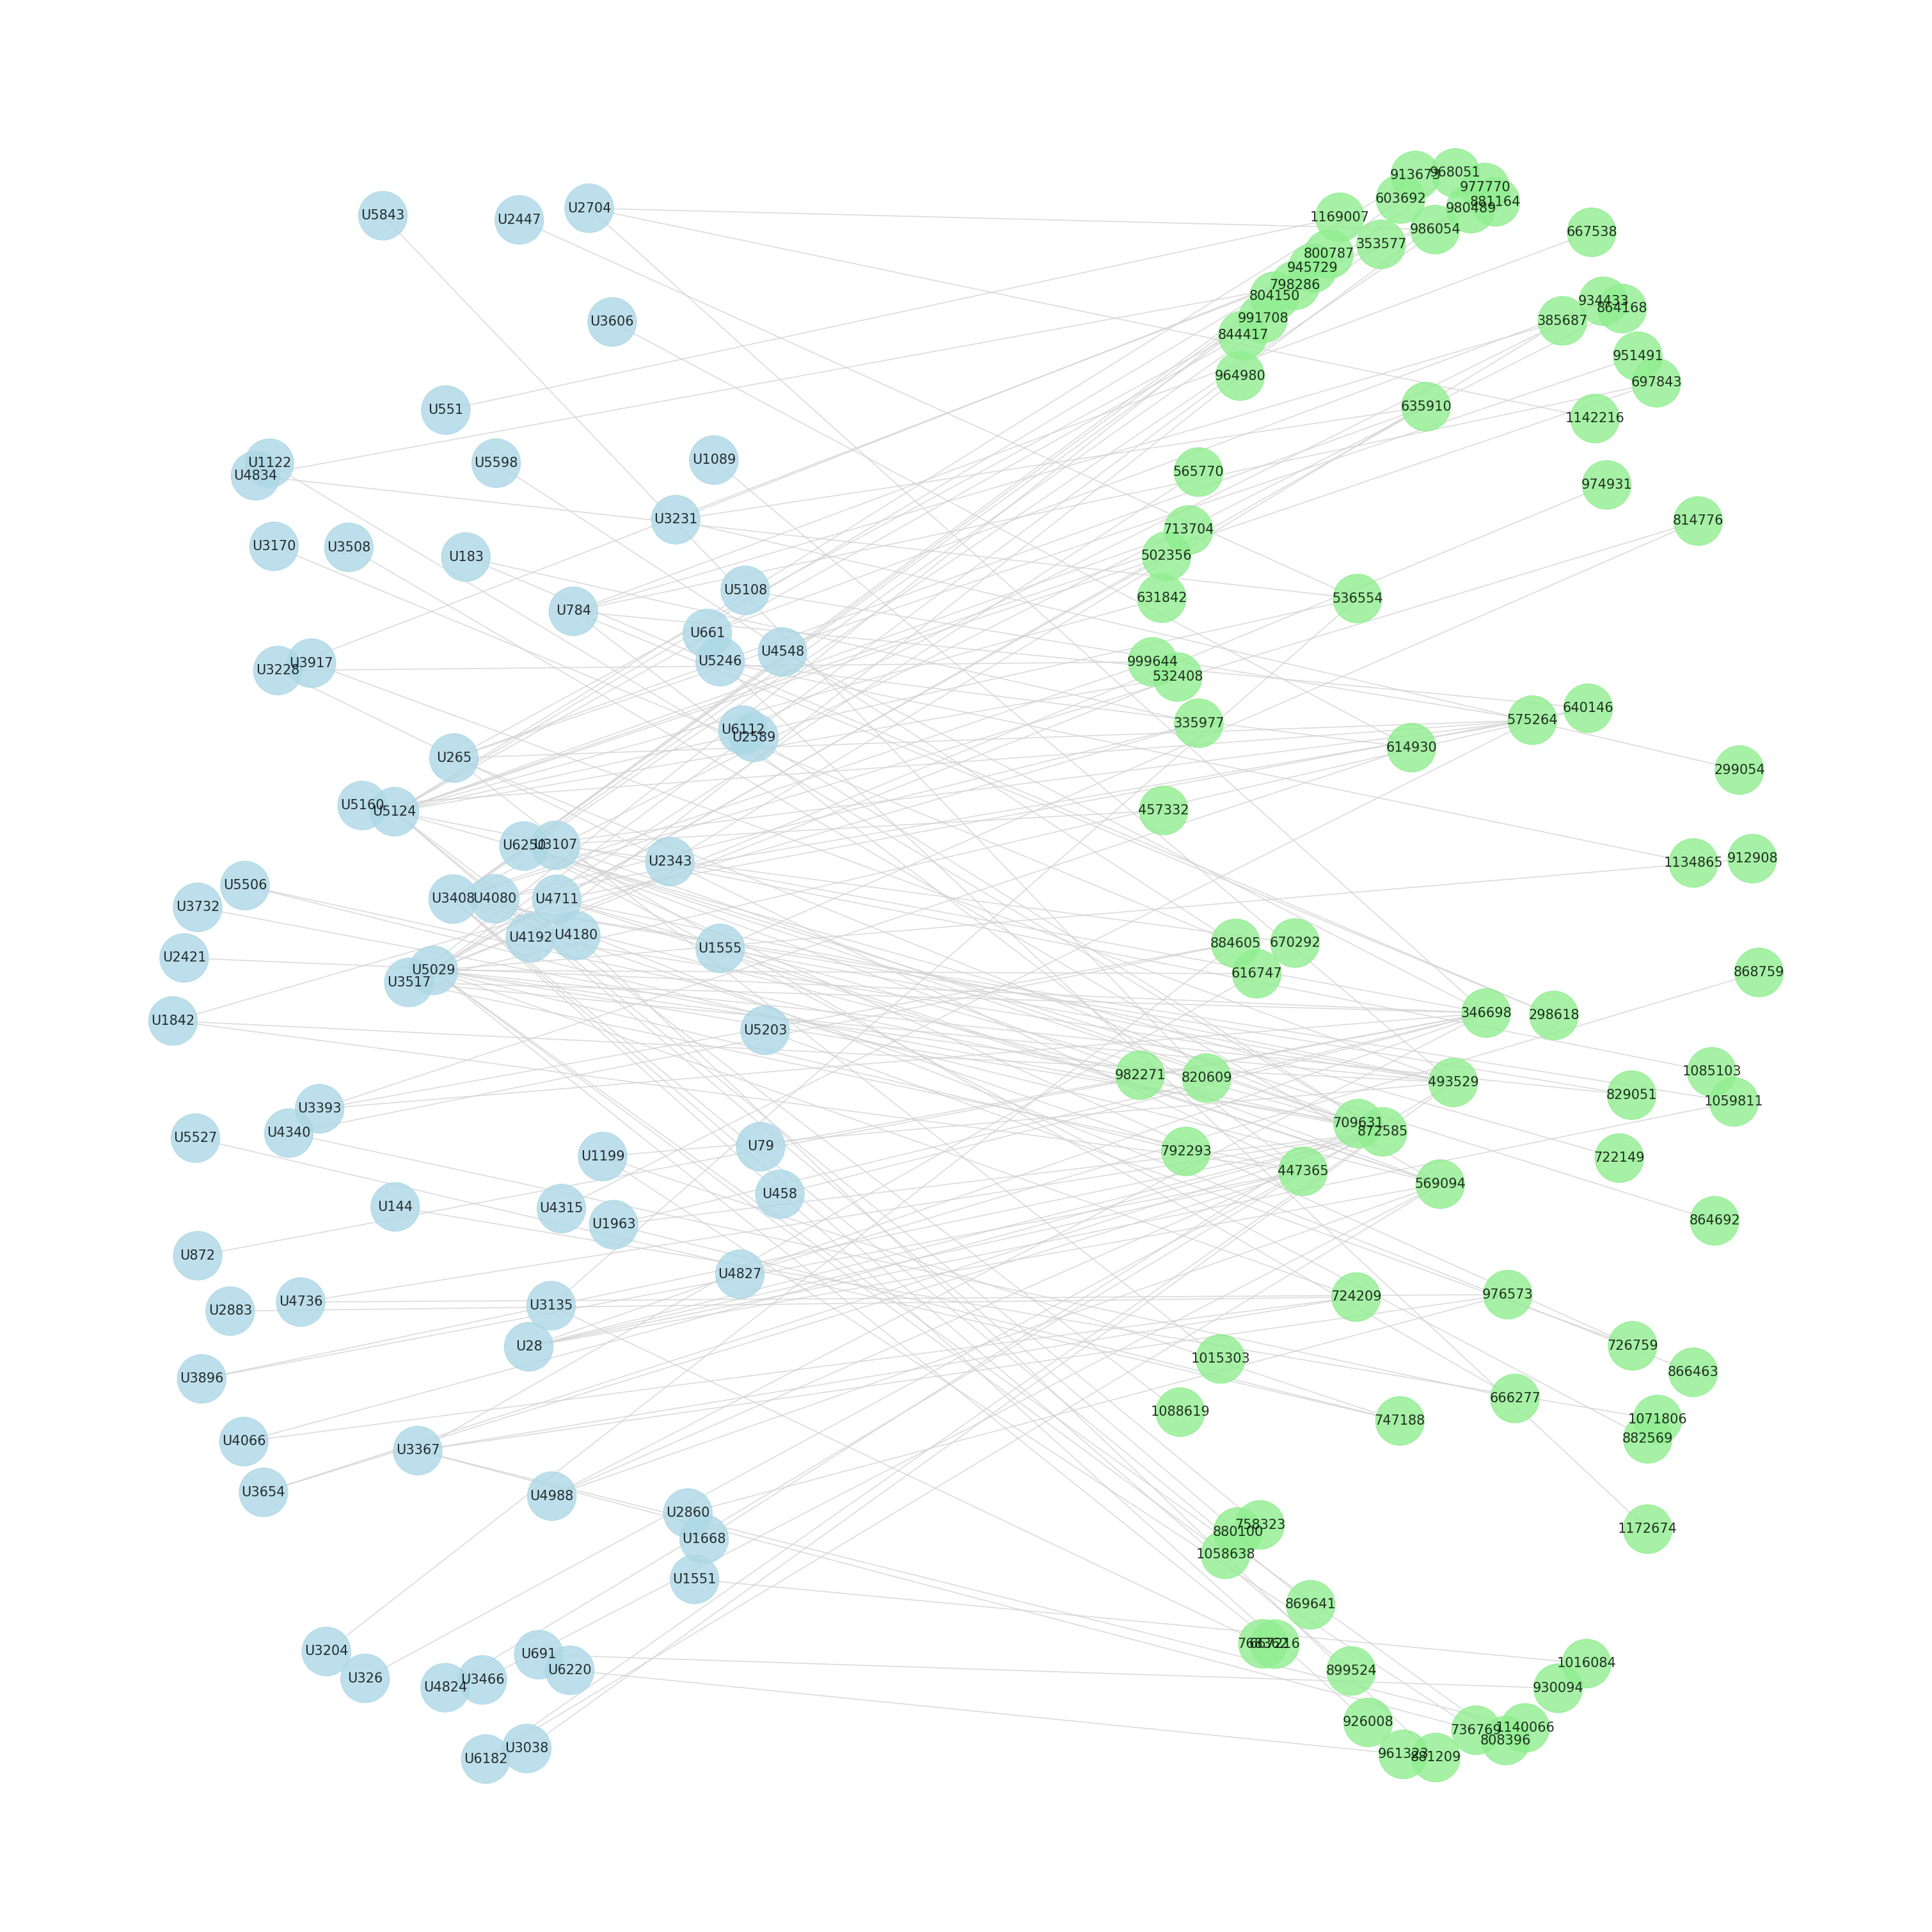

In [7]:
# Thiết lập kích thước của đồ thị
plt.figure(figsize=(30, 30))

# Sử dụng bố cục bipartite_layout
pos = nx.spring_layout(B, k=0.7)

# Tăng khoảng cách giữa các nhóm
for key, value in pos.items():
    if key in users:
        pos[key][0] -= 1.5  # Di chuyển nhóm user sang trái nhiều hơn
    else:
        pos[key][0] += 1.5  # Di chuyển nhóm movie sang phải nhiều hơn

# Điều chỉnh độ trong suốt và màu sắc của cạnh
nx.draw(B, pos,
        with_labels=True, 
        node_color=['lightblue' if n in users else 'lightgreen' for n in B.nodes()],
        node_size=3000,  # Tăng kích thước nút để dễ nhận diện hơn
        font_size=15,  # Tăng kích thước phông chữ
        edge_color='lightgray',  # Đổi màu cạnh để dễ nhìn hơn
        alpha=0.8,  # Tăng độ trong suốt của cạnh một chút để giảm sự rối mắt
        width=1.2)  # Giảm độ dày cạnh để tránh quá đậm

# Hiển thị đồ thị
plt.show()

## Chuyển đồ thị hai phía thành đồ thị một phía

In [8]:
# Tạo đồ thị chiếu người dùng-phim
user_movie = nx.bipartite.weighted_projected_graph(B, users)

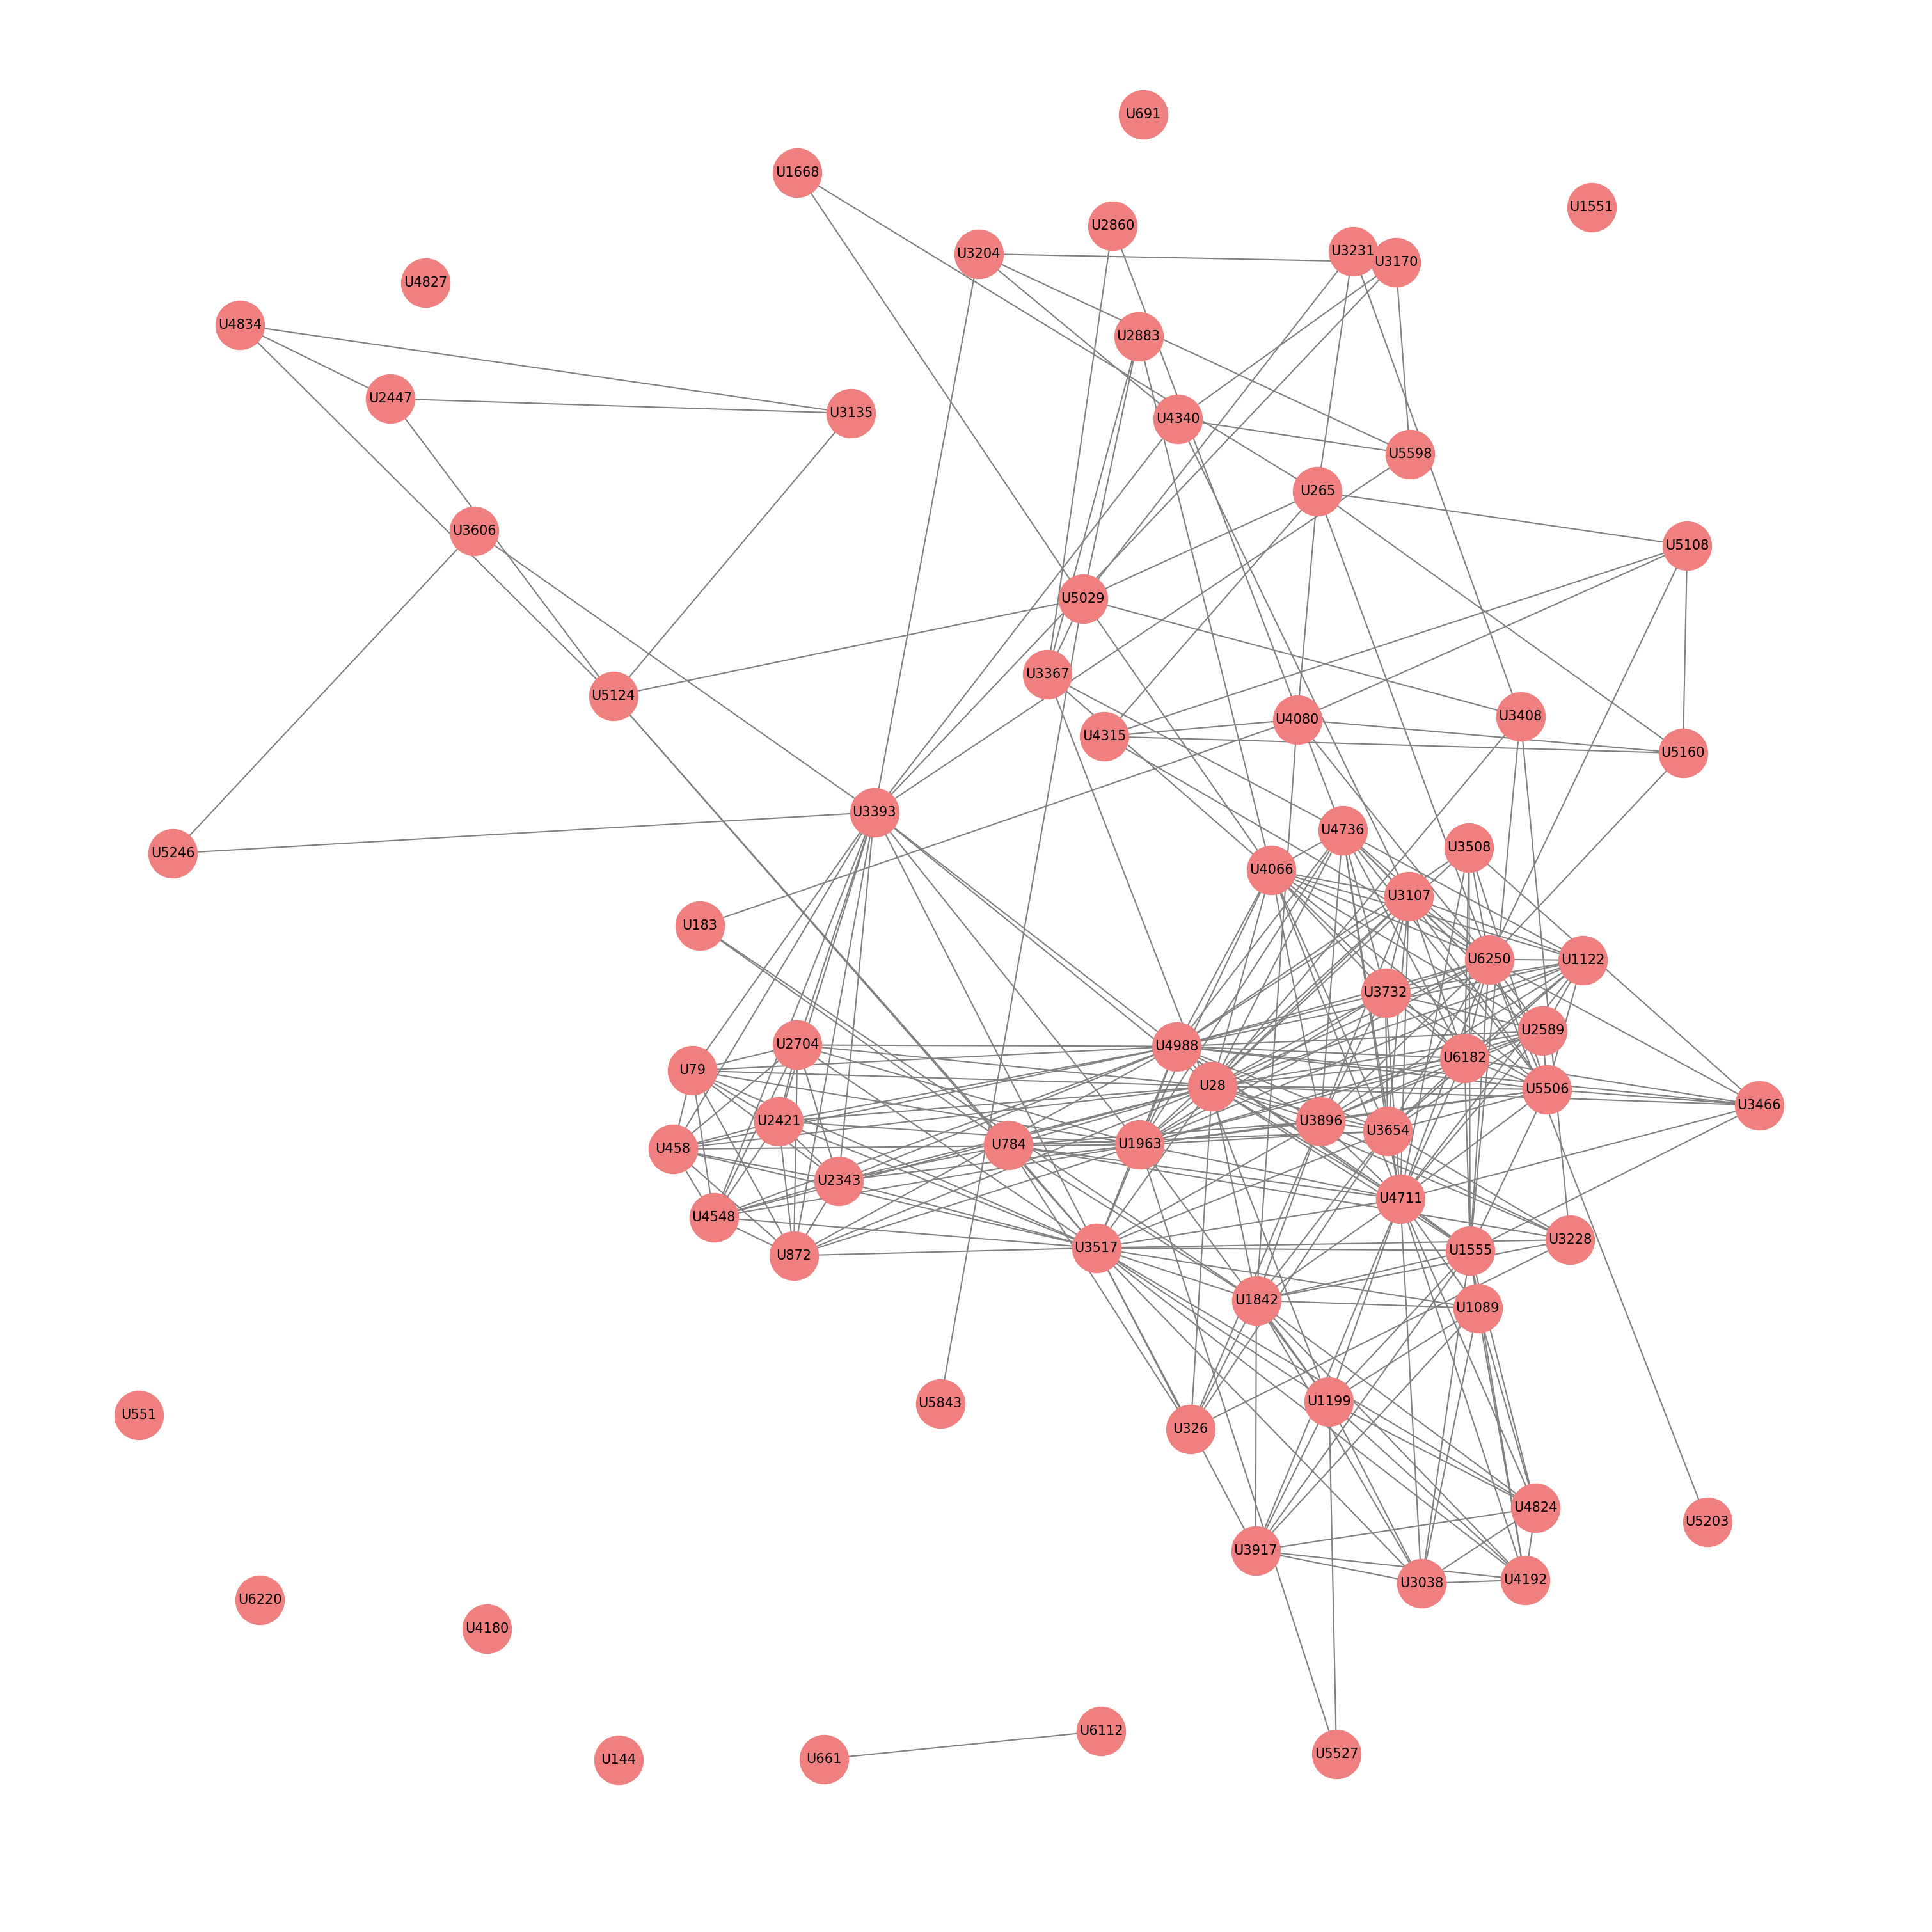

In [9]:
plt.figure(figsize=(30, 30))

# Vẽ đồ thị one-mode
pos = nx.spring_layout(user_movie, k=0.7)
nx.draw(user_movie, pos, with_labels=True, node_color='lightcoral', node_size=3000, font_size=15, edge_color='gray', width=1.5)
plt.show()

## Một số thuộc tính

In [10]:
# Số đỉnh số cạnh
print("Số đỉnh của đồ thị:", user_movie.number_of_nodes())
print("Số cạnh của đồ thị:", user_movie.number_of_edges())

Số đỉnh của đồ thị: 72
Số cạnh của đồ thị: 326


Đỉnh có nhiều cạnh kết nối nhất với các đỉnh khác.

In [11]:
degree_dict = dict(user_movie.degree())

max_degree_value = max(degree_dict.values())
print(f'Số mối quan hệ nhiều nhất là {max_degree_value}')

print('Các user có số quan hệ nhiều nhất là: ')
for key, value in degree_dict.items():
    if value == max_degree_value:
        print(f'\"{key}\"')

Số mối quan hệ nhiều nhất là 31
Các user có số quan hệ nhiều nhất là: 
"U28"


## Tính toán các độ đo trên đồ thị

In [12]:
# Tính toán Degree Centrality
degree_centrality = nx.degree_centrality(user_movie)
print("Degree Centrality:", degree_centrality)

# Tính toán Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(user_movie)
print("Betweenness Centrality:", betweenness_centrality)

# Tính toán Closeness Centrality
closeness_centrality = nx.closeness_centrality(user_movie)
print("Closeness Centrality:", closeness_centrality)

# Tính toán Harmonic Centrality
harmonic_centrality = nx.harmonic_centrality(user_movie)
print("Harmonic Centrality:", harmonic_centrality)

# Tính toán Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(user_movie)
print("Eigenvector Centrality:", eigenvector_centrality)

# Tính toán PageRank
pagerank = nx.pagerank(user_movie)
print("PageRank:", pagerank)

Degree Centrality: {'U28': 0.4366197183098592, 'U79': 0.15492957746478875, 'U144': 0.0, 'U183': 0.04225352112676056, 'U265': 0.11267605633802817, 'U326': 0.09859154929577466, 'U458': 0.15492957746478875, 'U551': 0.0, 'U661': 0.014084507042253521, 'U691': 0.0, 'U784': 0.15492957746478875, 'U872': 0.15492957746478875, 'U1089': 0.1267605633802817, 'U1122': 0.1971830985915493, 'U1199': 0.16901408450704225, 'U1551': 0.0, 'U1555': 0.23943661971830987, 'U1668': 0.028169014084507043, 'U1842': 0.23943661971830987, 'U1963': 0.35211267605633806, 'U2343': 0.16901408450704225, 'U2421': 0.15492957746478875, 'U2447': 0.04225352112676056, 'U2589': 0.1971830985915493, 'U2704': 0.15492957746478875, 'U2860': 0.028169014084507043, 'U2883': 0.04225352112676056, 'U3038': 0.1267605633802817, 'U3107': 0.2112676056338028, 'U3135': 0.04225352112676056, 'U3170': 0.056338028169014086, 'U3204': 0.056338028169014086, 'U3228': 0.11267605633802817, 'U3231': 0.04225352112676056, 'U3367': 0.08450704225352113, 'U3393': 

Tìm key player trong mạng xã hội.

In [13]:
def find_highest_centrality(graph):
    # Tính toán các chỉ số centrality
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    harmonic_centrality = nx.harmonic_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph)
    pagerank = nx.pagerank(graph)

    # Tìm node có giá trị cao nhất cho từng loại centrality
    max_degree_node = max(degree_centrality, key=degree_centrality.get)
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
    max_harmonic_node = max(harmonic_centrality, key=harmonic_centrality.get)
    max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
    max_pagerank_node = max(pagerank, key=pagerank.get)

    centrality_data = [
        ("Degree", max_degree_node, degree_centrality),
        ("Betweenness", max_betweenness_node, betweenness_centrality),
        ("Closeness", max_closeness_node, closeness_centrality),
        ("Harmonic", max_harmonic_node, harmonic_centrality),
        ("Eigenvector", max_eigenvector_node, eigenvector_centrality),
        ("PageRank", max_pagerank_node, pagerank)
    ]
    data = {
        "Centrality Type": [name for name, node, _ in centrality_data],
        "Node": [node for _, node, _ in centrality_data],
        "Value": [centrality[node] for _, node, centrality in centrality_data]
    }
    df = pd.DataFrame(data)
    print("Các node có giá trị cao nhất cho từng loại centrality:")
    print(df)

    return {
        "Degree": (max_degree_node, degree_centrality[max_degree_node]),
        "Closeness": (max_closeness_node, closeness_centrality[max_closeness_node]),
        "Betweenness": (max_betweenness_node, betweenness_centrality[max_betweenness_node]),
        "Harmonic": (max_harmonic_node, harmonic_centrality[max_harmonic_node]),
        "Eigenvector": (max_eigenvector_node, eigenvector_centrality[max_eigenvector_node]),
        "PageRank": (max_pagerank_node, pagerank[max_pagerank_node])
    }

Các node có giá trị cao nhất cho từng loại centrality:
  Centrality Type   Node      Value
0          Degree    U28   0.436620
1     Betweenness  U3393   0.116601
2       Closeness    U28   0.552458
3        Harmonic    U28  45.666667
4     Eigenvector    U28   0.295285
5        PageRank    U28   0.043680


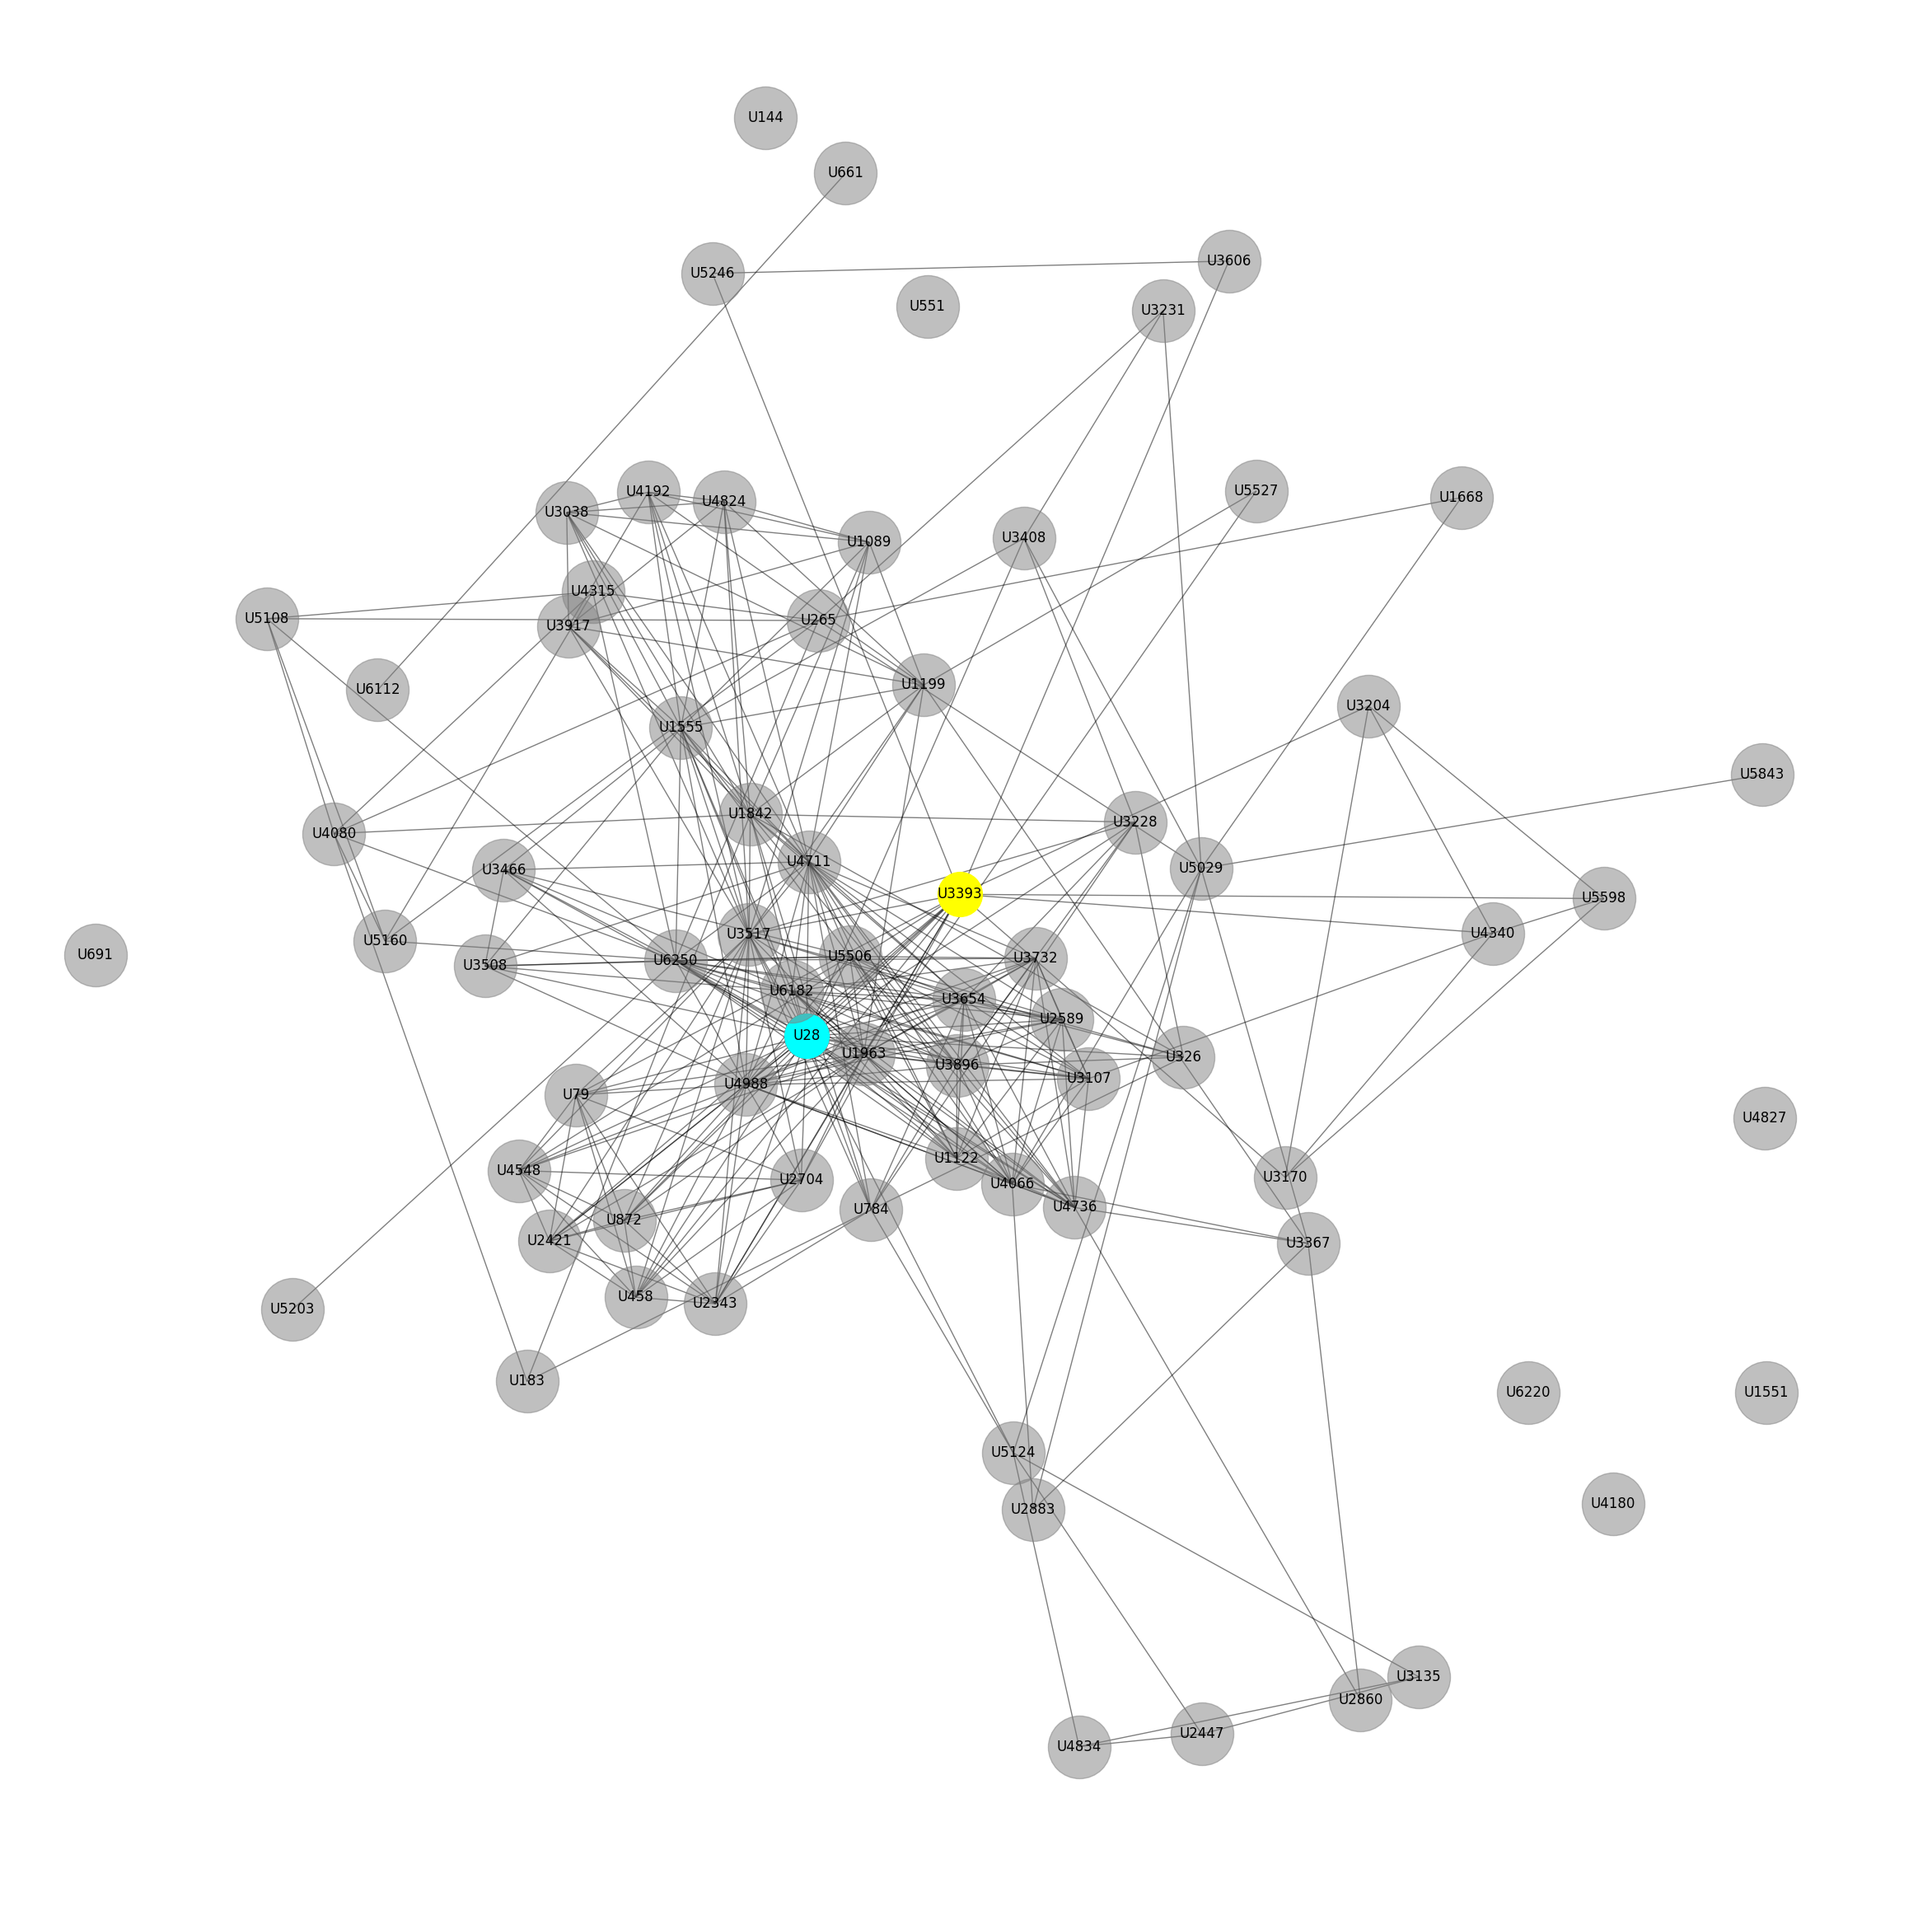

In [14]:
def plot_graph_with_centrality(graph, centrality_results):
    centrality_colors = {
        "Degree": "red",
        "Closeness": "blue",
        "Betweenness": "yellow",
        "Harmonic": "purple",
        "Eigenvector": "orange",
        "PageRank": "cyan"
    }

    plt.figure(figsize=(30, 30))
    plt.axis('off')

    pos = nx.spring_layout(graph, k=0.7)
    
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)
    
    for centrality, (node, _) in centrality_results.items():
        nx.draw_networkx_nodes(graph, pos, nodelist=[node], node_color=centrality_colors[centrality], label=centrality, node_size=1500)
    
    # Draw remaining nodes (non-highlighted) in gray
    remaining_nodes = set(graph.nodes) - {node for node, _ in centrality_results.values()}
    nx.draw_networkx_nodes(graph, pos, nodelist=list(remaining_nodes), node_color="gray", alpha=0.5, node_size=3000)

    
    plt.show()

result = find_highest_centrality(user_movie)
plot_graph_with_centrality(user_movie, result)


---
**<center> Gợi ý phim dự trên tần suất xuất hiện của các user liên quan </center>** 

In [15]:
def recommend_movies_for_user(user, B, users):
    # Tạo các phim được xem bởi user
    user_movie = nx.bipartite.weighted_projected_graph(B, users)
    print("========== User movie  ==========")
    print(user_movie)
    print("=====================================")
    
    # Lấy các phim mà người dùng đã đánh giá
    user_movies = set(B.neighbors(user))

    print("========== User movie ==========")
    print(user_movies)
    print("=====================================")
    
    # Tìm các người dùng đã đánh giá các phim
    recommendations = {}
    print("\n======================= LIST MOVIE OF NEIGHBOR ===========================")
    for neighbor in user_movie.neighbors(user):
        # Lấy phim mà người dùng đã đánh giá
        neighbor_movies = set(B.neighbors(neighbor))
        
        print(f"========== movie rated by Neighbor {neighbor} ==========")
        print(neighbor_movies)
        print("=====================================")
        
        # tìm các phim mà người dùng chưa đánh giá
        suggested_movies = neighbor_movies - user_movies
        
        # Ghi lại tần suất xuất hiện của các phim được đề xuất
        for so in suggested_movies: 
            recommendations[so] = recommendations.get(so, 0) + 1
    
    # Sắp xếp các phim được gợi ý dựa trên tần suất xuất hiện
    recommended_movies = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    
    return recommended_movies

In [16]:
# Ví dụ: Gợi ý phim cho người dùng 
user = 'U661'
recommended_for_user = recommend_movies_for_user(user, B, users)
print(f"Recommend movie for user {user}:", recommended_for_user)

========== User movie  ==========
Graph with 72 nodes and 326 edges
========== User movie ==========
{934433}

======================= LIST MOVIE OF NEIGHBOR ===========================
========== movie rated by Neighbor U6112 ==========
{934433}
Recommend movie for user U661: []


## Khám phá cộng đồng


**<center> Thuật toán Girvan Newman</center>**

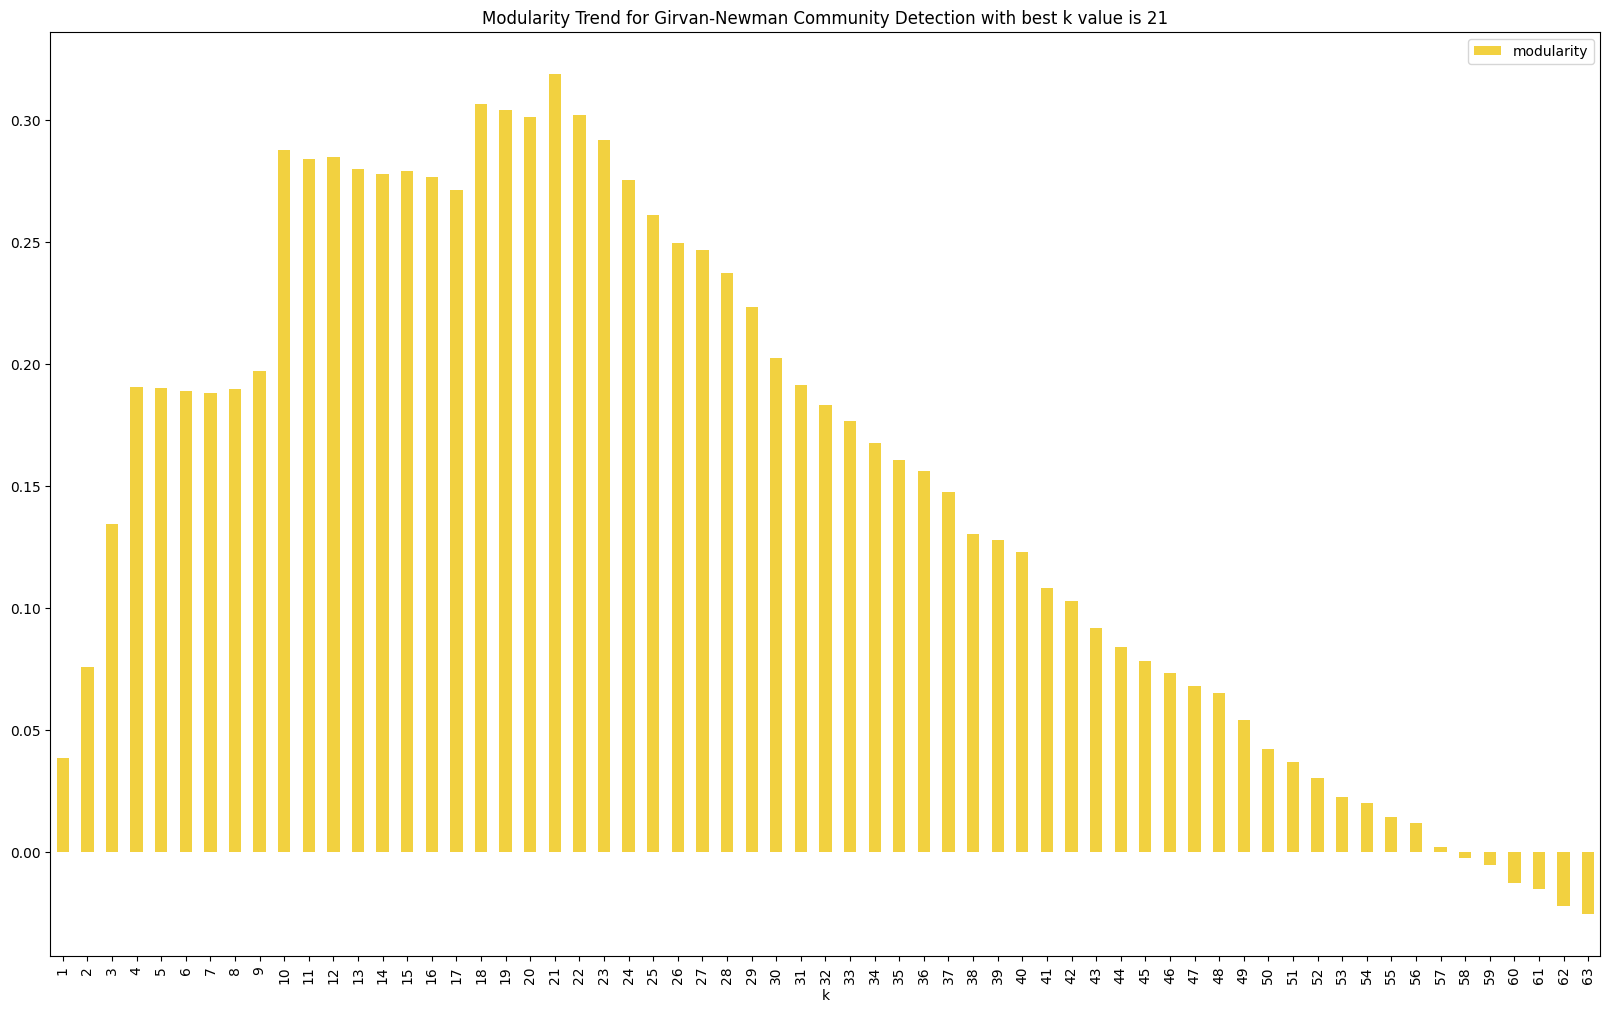

In [17]:
G = user_movie.copy() 

# Find communities using Girvan-Newman
communities = list(nx.community.girvan_newman(G))

# Calculate modularity for each partition level
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ], 
    columns=["k", "modularity"],
)

# Find the k value with the highest modularity
best_k = (modularity_df.loc[modularity_df["modularity"]
                            .idxmax()]["k"]).astype(int)

fig, ax = plt.subplots(figsize=(20, 12))

# Plot change in modularity
modularity_df.plot.bar(
    x="k",
    y="modularity",
    ax=ax,
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection with best k value is " + str(best_k),
)
plt.show()

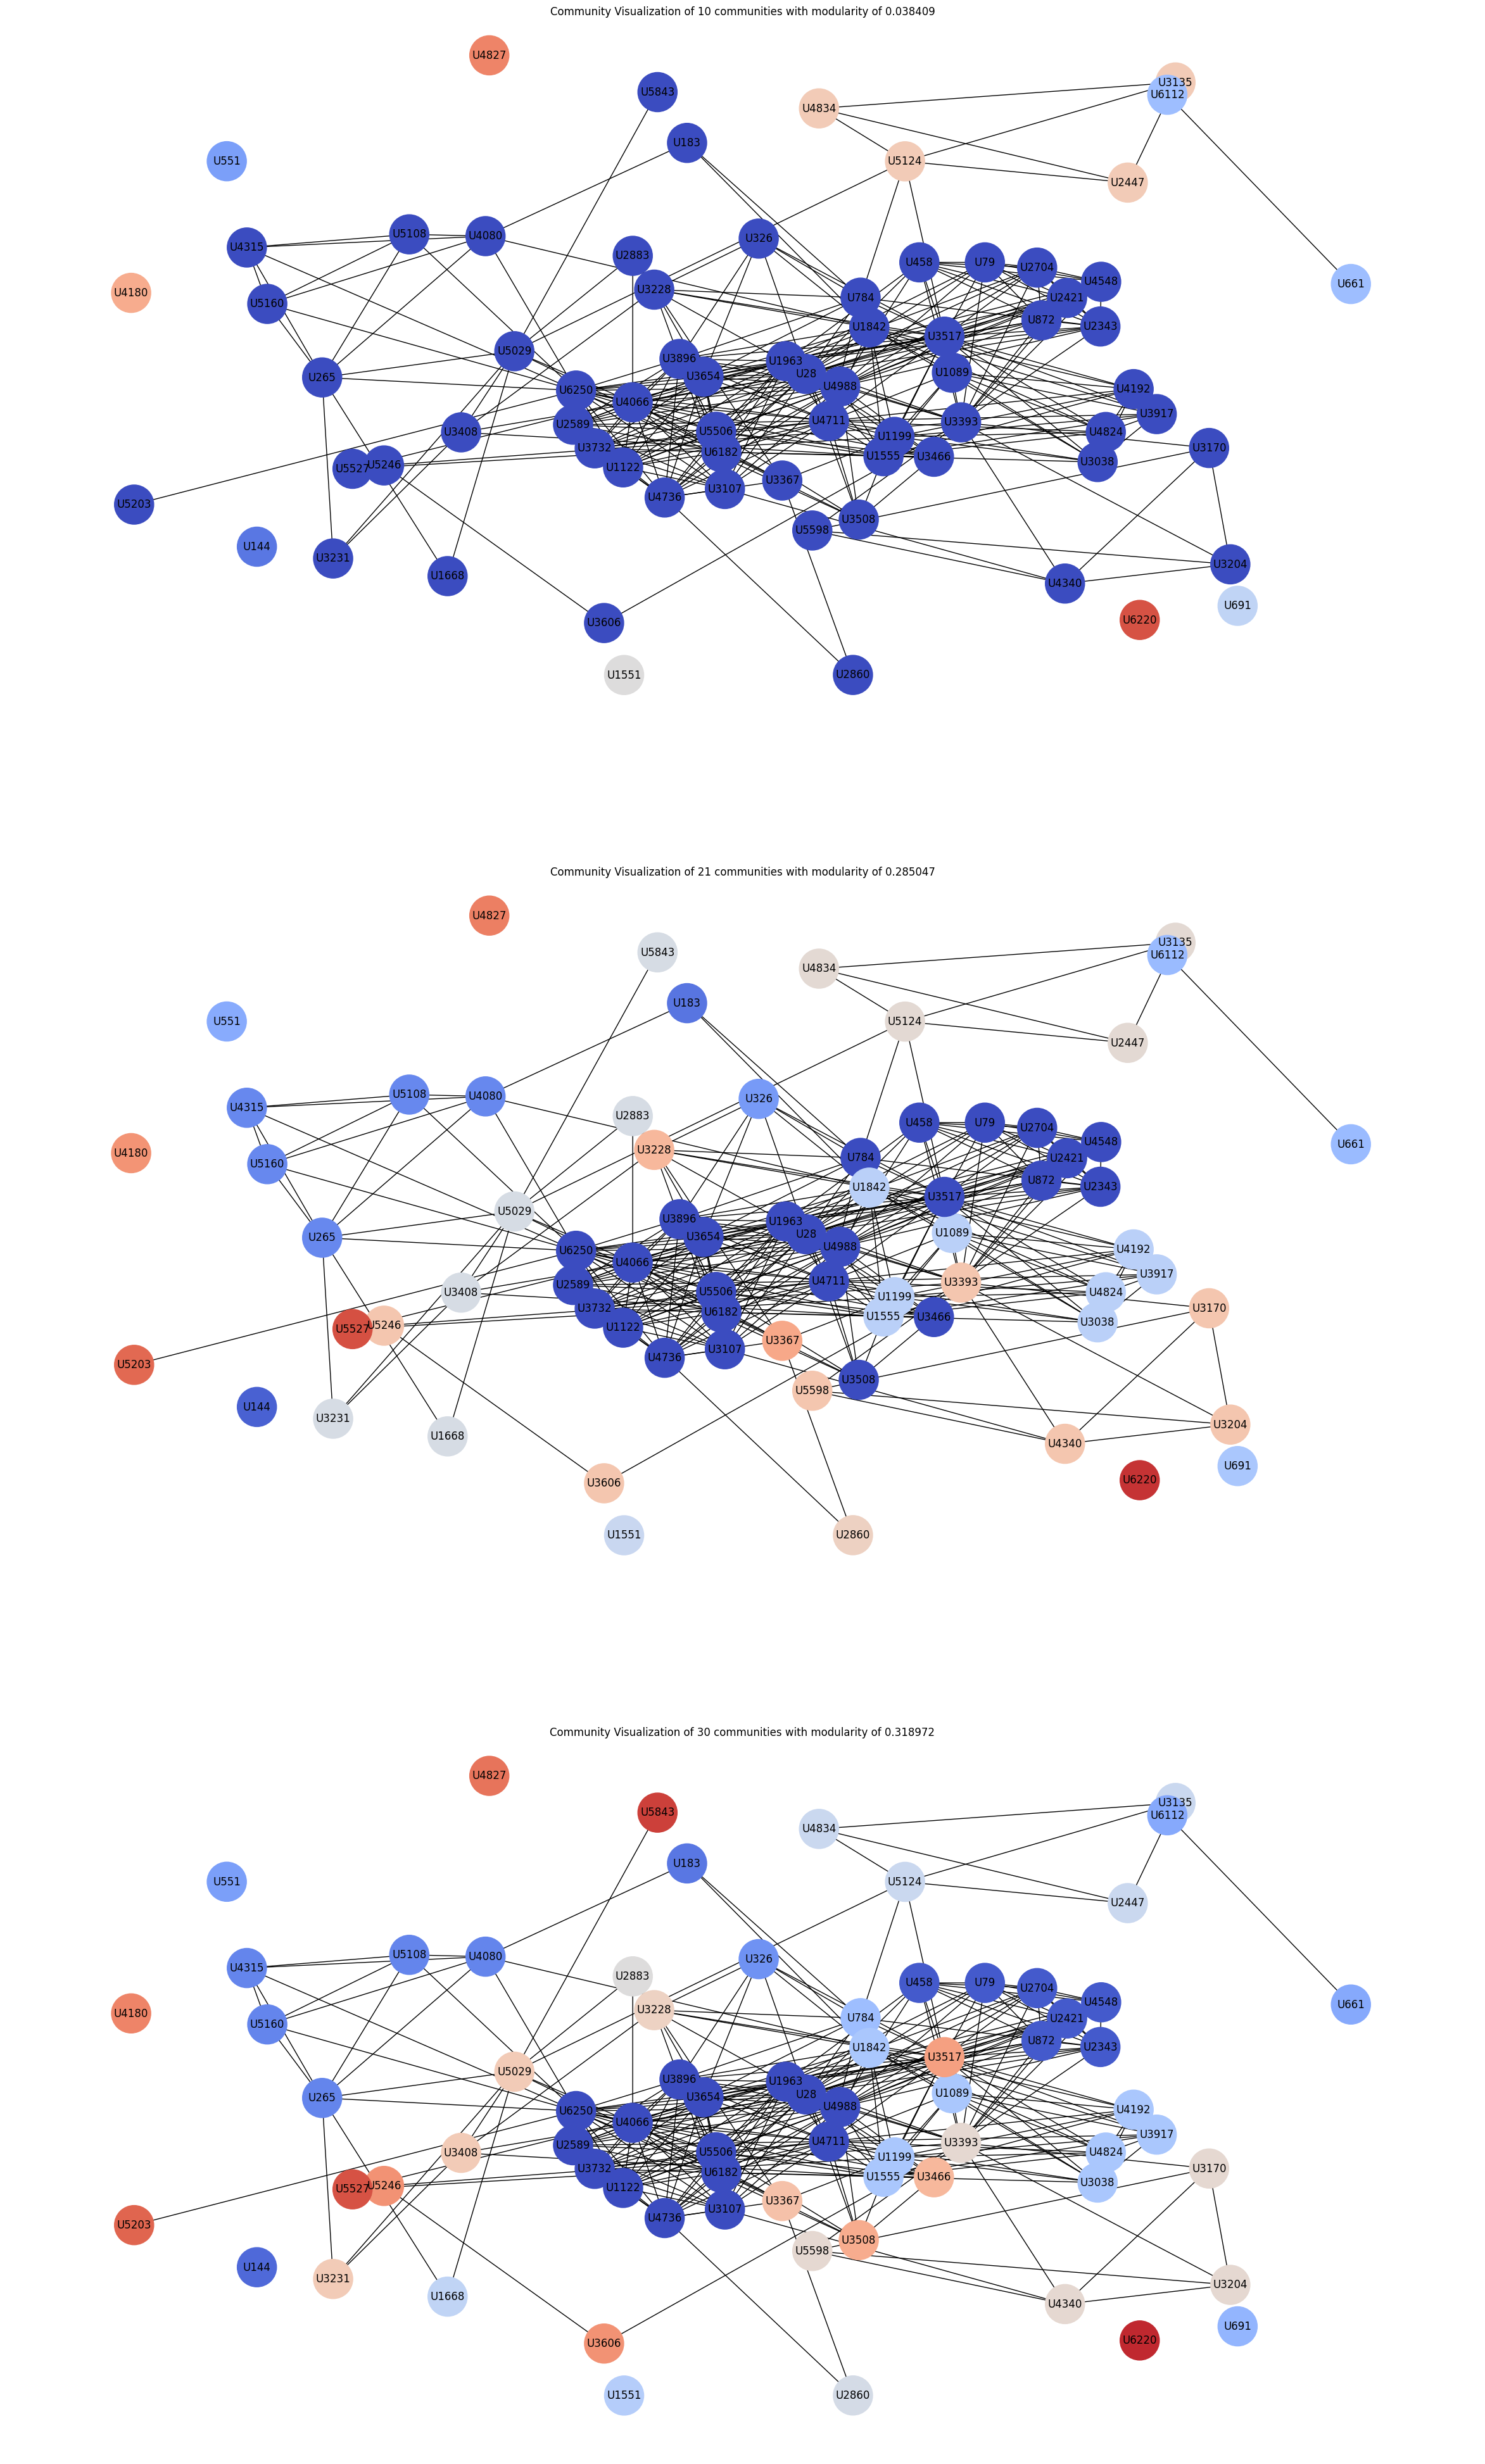

In [18]:
def create_community_node_colors(graph, communities):
    num_communities = len(communities)
    cmap = plt.colormaps['coolwarm']
    node_colors = []
    for node in graph:
        for i, community in enumerate(communities):
            if node in community:
                node_colors.append(cmap(i / num_communities))
                break
    return node_colors

# Function to plot graph with node colors based on communities
def visualize_communities(graph, communities, subplot_index):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.7, iterations=50, seed=2)
    plt.subplot(3, 1, subplot_index)
    plt.title(title)
    nx.draw(
        graph, pos=pos, node_size=2000, node_color=node_colors, 
        with_labels=True, font_size=12, font_color="black",
    )
fig, ax = plt.subplots(3, figsize=(30, 50))

# k = 1
visualize_communities(G, communities[0], 1)
# k = 12
visualize_communities(G, communities[11], 2)
# k = 22 (best)
visualize_communities(G, communities[best_k-1], 3)

In [19]:
from collections import Counter

partition = {node: idx for idx, community in enumerate(communities[best_k-1]) for node in community}

user_movie_history = {}
for user, movie in edges:
    if user not in user_movie_history:
        user_movie_history[user] = []
    user_movie_history[user].append(movie)

# Tạo danh sách phim phổ biến trong từng cộng đồng
community_recommendations = {}
for community_id in set(partition.values()):
    # Lấy danh sách các thành viên trong cộng đồng
    community_members = [user for user, com_id in partition.items() if com_id == community_id]
    
    # Đếm các bộ phim đã xem trong cộng đồng
    movie_counter = Counter()
    for user in community_members:
        movies = user_movie_history.get(user, [])
        movie_counter.update(movies)
    
    # Chọn top 5 phim phổ biến trong cộng đồng
    popular_movies = [movie for movie, _ in movie_counter.most_common(5)]
    community_recommendations[community_id] = popular_movies

# Tạo gợi ý cho từng người dùng
user_recommendations = {}
for user, community_id in partition.items():
    # Lấy phim phổ biến trong cộng đồng mà người dùng chưa xem
    movies_watched = set(user_movie_history.get(user, []))
    recommendations = [movie for movie in community_recommendations[community_id] if movie not in movies_watched]
    user_recommendations[user] = recommendations

**<center> Thuật toán Louvain </center>**

```bash
pip install python-louvain

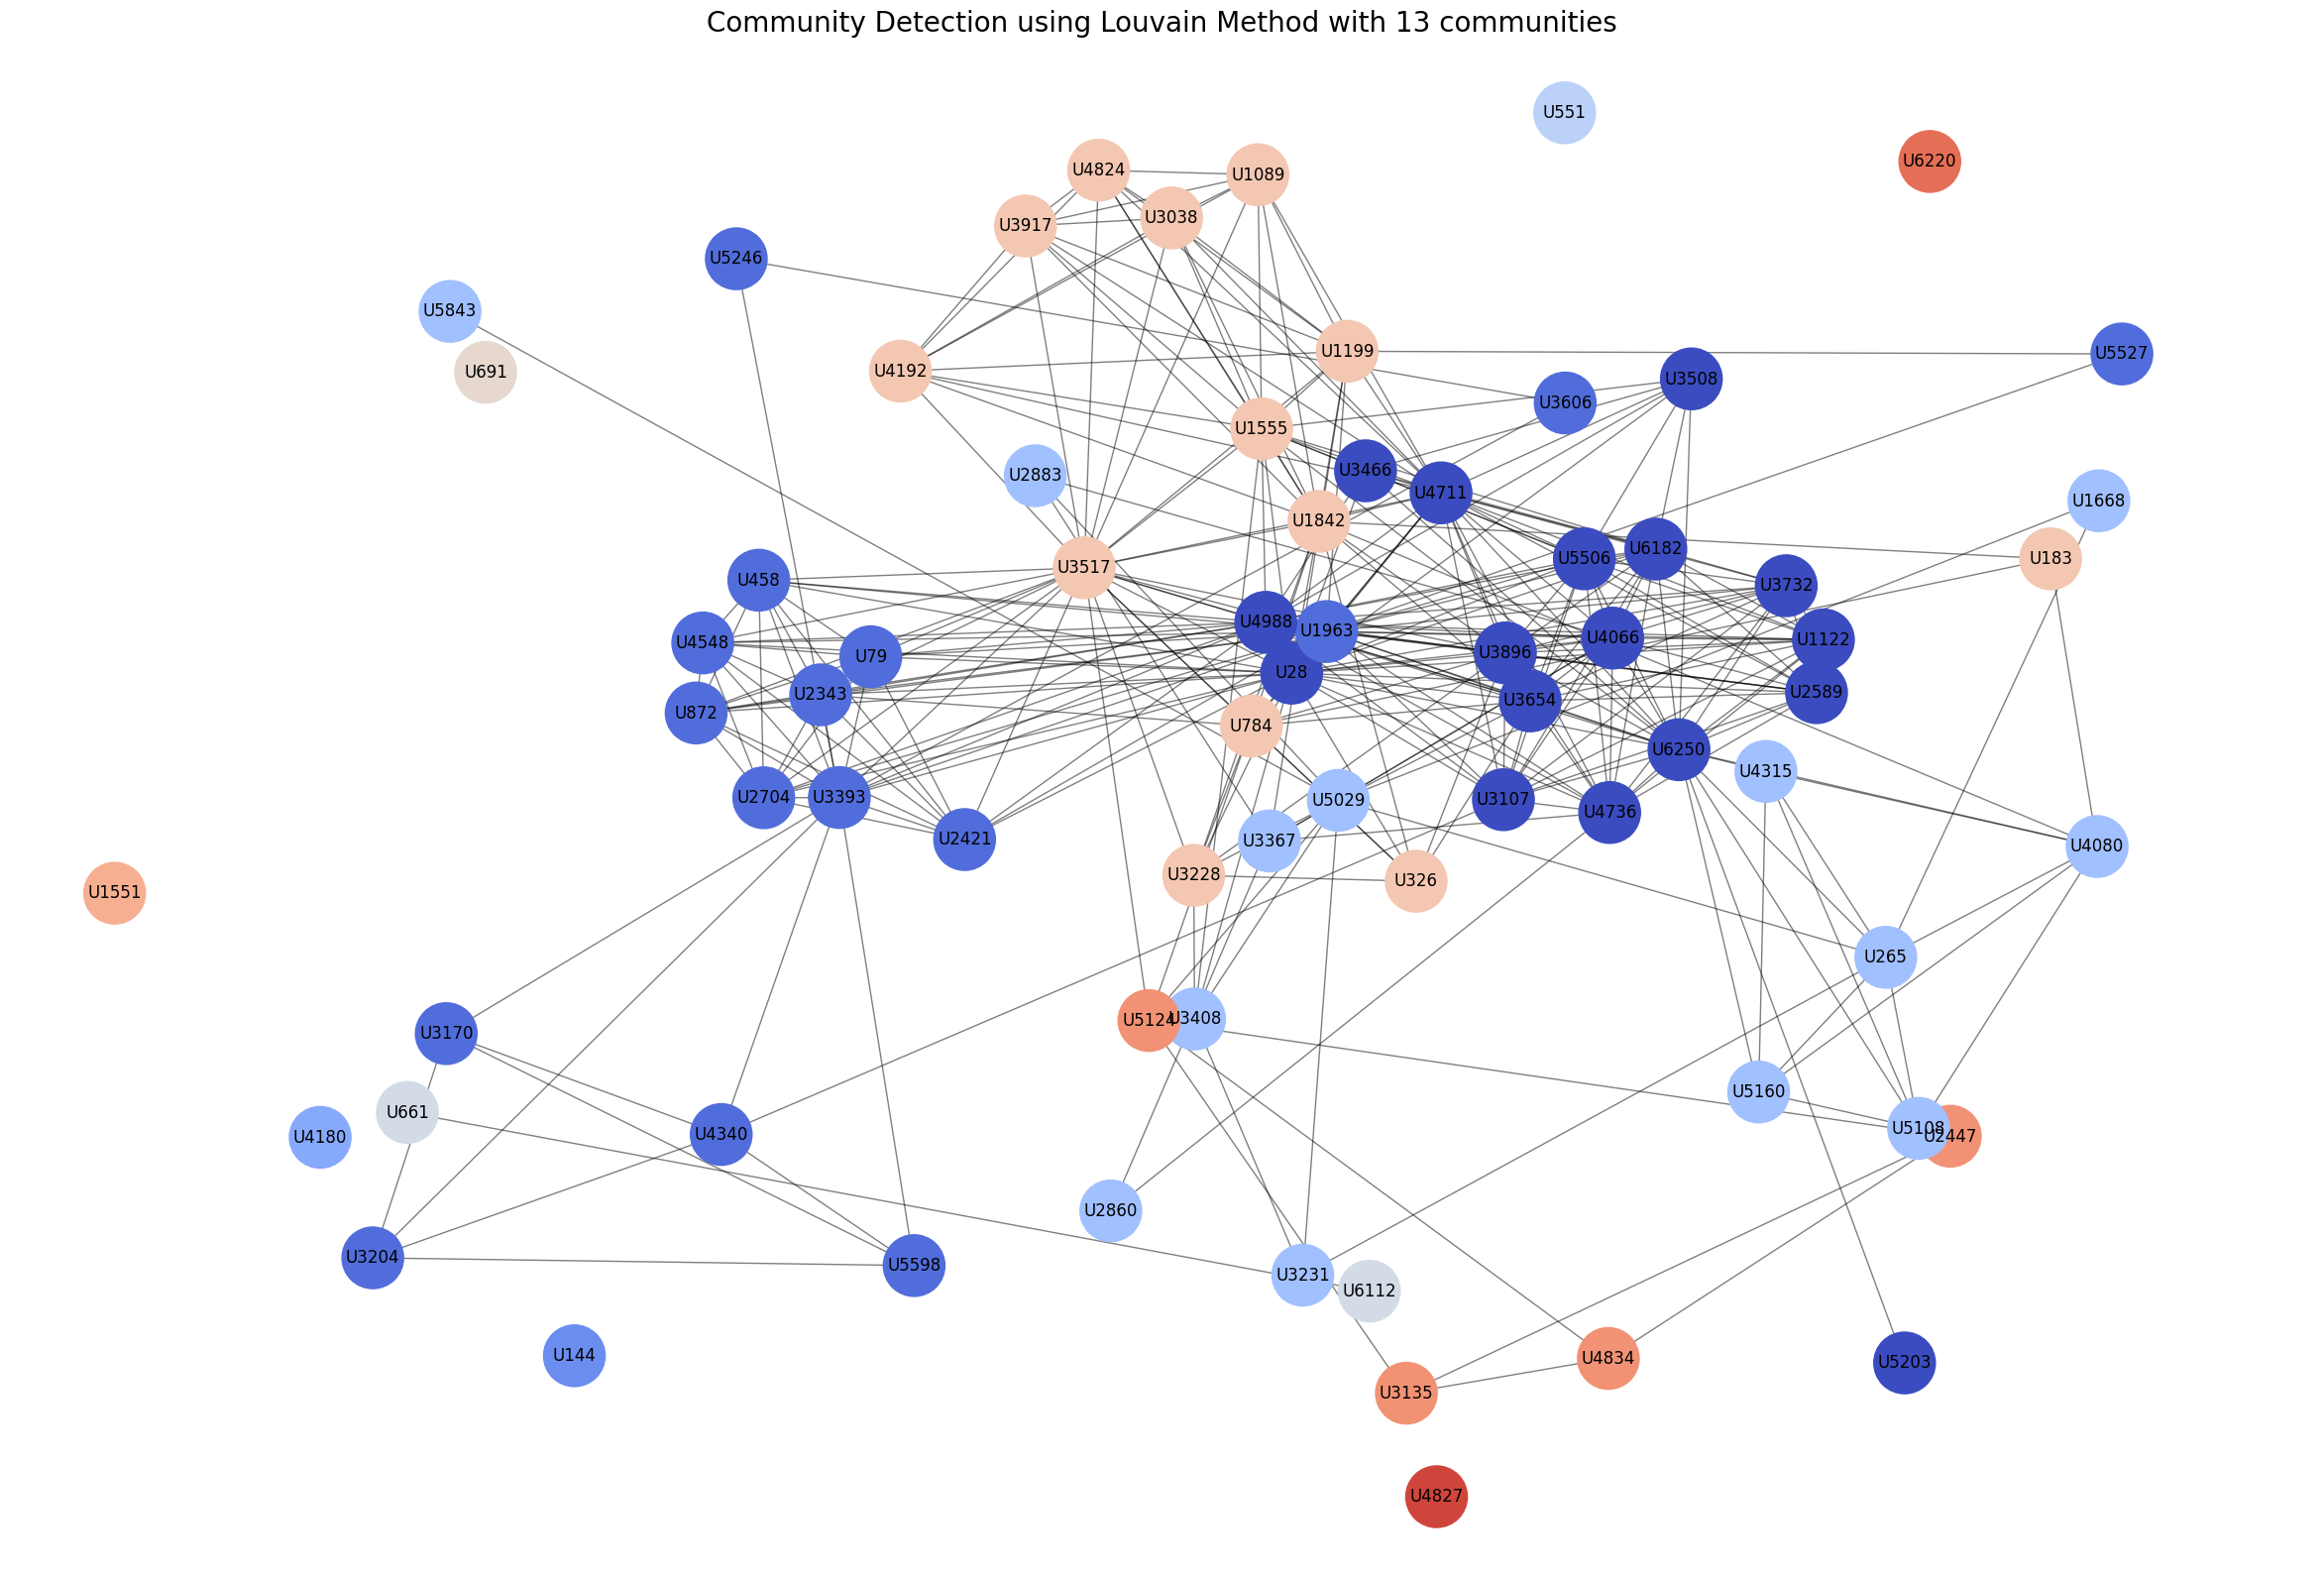

In [20]:
import community.community_louvain as community_louvain

G = user_movie.copy()

partition = community_louvain.best_partition(G)
value = list(partition.values())

plt.figure(figsize=(30, 20))
plt.axis('off')
pos = nx.spring_layout(G, k=0.7)
cmap = plt.colormaps['coolwarm']  # Lấy bảng màu 'viridis'

# Tạo màu sắc cho từng nút
num_colors = max(value) + 1
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Vẽ các nút
nx.draw_networkx_nodes(G, pos, node_size=2000, 
    node_color=[colors[partition[node]] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title(f"Community Detection using Louvain Method with {num_colors} communities", fontsize=20)

plt.show()

In [ ]:
from collections import Counter

user_movie_history = {}
for user, movie in edges:
    if user not in user_movie_history:
        user_movie_history[user] = []
    user_movie_history[user].append(movie)

# Tạo danh sách phim phổ biến trong từng cộng đồng
community_recommendations = {}
for community_id in set(partition.values()):
    # Lấy danh sách các thành viên trong cộng đồng
    community_members = [user for user, com_id in partition.items() if com_id == community_id]
    
    # Đếm các bộ phim đã xem trong cộng đồng
    movie_counter = Counter()
    for user in community_members:
        movies = user_movie_history.get(user, [])
        movie_counter.update(movies)
    
    # Chọn top 5 phim phổ biến trong cộng đồng
    popular_movies = [movie for movie, _ in movie_counter.most_common(5)]
    community_recommendations[community_id] = popular_movies

# Tạo gợi ý cho từng người dùng
user_recommendations = {}
for user, community_id in partition.items():
    # Lấy phim phổ biến trong cộng đồng mà người dùng chưa xem
    movies_watched = set(user_movie_history.get(user, []))
    recommendations = [movie for movie in community_recommendations[community_id] if movie not in movies_watched]
    user_recommendations[user] = recommendations


: 

---